In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('NewOrleans_clean copy.csv')

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7522 entries, 0 to 7521
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   7522 non-null   int64  
 1   id                           7522 non-null   int64  
 2   scrape_id                    7522 non-null   int64  
 3   host_id                      7522 non-null   int64  
 4   latitude                     7522 non-null   float64
 5   longitude                    7522 non-null   float64
 6   neighbourhood_cleansed       7522 non-null   object 
 7   property_type                7522 non-null   object 
 8   room_type                    7522 non-null   object 
 9   host_since                   7522 non-null   object 
 10  host_location                7522 non-null   object 
 11  host_response_time           7522 non-null   object 
 12  host_response_rate           7522 non-null   object 
 13  host_acceptance_ra

In [91]:
valores_nulos=df.isnull().sum()
valores_nulos

Unnamed: 0                     0
id                             0
scrape_id                      0
host_id                        0
latitude                       0
longitude                      0
neighbourhood_cleansed         0
property_type                  0
room_type                      0
host_since                     0
host_location                  0
host_response_time             0
host_response_rate             0
host_acceptance_rate           0
host_is_superhost              0
host_listings_count            0
host_total_listings_count      0
host_has_profile_pic           0
host_identity_verified         0
accommodates                   0
bathrooms                      0
bathrooms_text                 0
bedrooms                       0
beds                           0
amenities                      0
price                          0
minimum_nights                 0
maximum_nights                 0
minimum_minimum_nights         0
maximum_minimum_nights         0
minimum_ma

In [92]:
df = df.drop(columns=['Unnamed: 0'])
df = df.drop(columns=['id'])
df = df.drop(columns=['scrape_id'])
df = df.drop(columns=['host_id'])

In [93]:
df["host_response_rate"] = df["host_response_rate"].str.replace("%", "", regex=False).astype(float)

In [94]:
df["price"] = df["price"].replace({'\$': '', ',': ''}, regex=True)  # Eliminamos $ y comas
df["price"] = df["price"].astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
/var/folders/9j/wm9ykq0j7ql95x8sql60c0680000gn/T/ipykernel_39491/3050528424.py:1: SyntaxWarning: invalid escape sequence '\$'
  df["price"] = df["price"].replace({'\$': '', ',': ''}, regex=True)  # Eliminamos $ y comas


In [95]:
mis_cuantitativas = ["host_response_rate", "host_listings_count", "host_total_listings_count","bedrooms", "beds", "price", "minimum_nights", "maximum_nights", "minimum_minimum_nights","maximum_minimum_nights", "minimum_maximum_nights", "maximum_maximum_nights","accommodates","bathrooms", "minimum_nights_avg_ntm", "maximum_nights_avg_ntm", "availability_30","availability_60",	"availability_90",	"availability_365",	"availability_eoy",	"number_of_reviews","number_of_reviews_ltm","number_of_reviews_l30d","number_of_reviews_ly","reviews_per_month","review_scores_rating",	"review_scores_accuracy","review_scores_cleanliness","review_scores_communication",	"review_scores_location"]   # Cambia según tus columnas
mis_cualitativas = ["latitude", "longitude", "neighbourhood_cleansed", "property_type", "room_type", "host_since", "host_location", "host_response_time", "host_is_superhost", "host_has_profile_pic", "host_identity_verified", "bathrooms_text",
                    "amenities", "has_availability"] # Cambia según tus columnas

cuantitativas = df[mis_cuantitativas]
cualitativas = df[mis_cualitativas]

# Mostramos resultados
print("Columnas cuantitativas seleccionadas:")
print(cuantitativas.dtypes)

print("\nColumnas cualitativas seleccionadas:")
print(cualitativas.dtypes)

Columnas cuantitativas seleccionadas:
host_response_rate             float64
host_listings_count              int64
host_total_listings_count        int64
bedrooms                       float64
beds                           float64
price                          float64
minimum_nights                   int64
maximum_nights                   int64
minimum_minimum_nights           int64
maximum_minimum_nights           int64
minimum_maximum_nights           int64
maximum_maximum_nights           int64
accommodates                     int64
bathrooms                      float64
minimum_nights_avg_ntm         float64
maximum_nights_avg_ntm         float64
availability_30                  int64
availability_60                  int64
availability_90                  int64
availability_365                 int64
availability_eoy                 int64
number_of_reviews                int64
number_of_reviews_ltm            int64
number_of_reviews_l30d           int64
number_of_reviews_ly      

In [96]:
print(cualitativas.dtypes)

latitude                  float64
longitude                 float64
neighbourhood_cleansed     object
property_type              object
room_type                  object
host_since                 object
host_location              object
host_response_time         object
host_is_superhost          object
host_has_profile_pic       object
host_identity_verified     object
bathrooms_text             object
amenities                  object
has_availability           object
dtype: object


In [97]:
print("\nColumnas cualitativas:")
print(cualitativas.dtypes)


Columnas cualitativas:
latitude                  float64
longitude                 float64
neighbourhood_cleansed     object
property_type              object
room_type                  object
host_since                 object
host_location              object
host_response_time         object
host_is_superhost          object
host_has_profile_pic       object
host_identity_verified     object
bathrooms_text             object
amenities                  object
has_availability           object
dtype: object


<Figure size 1500x800 with 0 Axes>

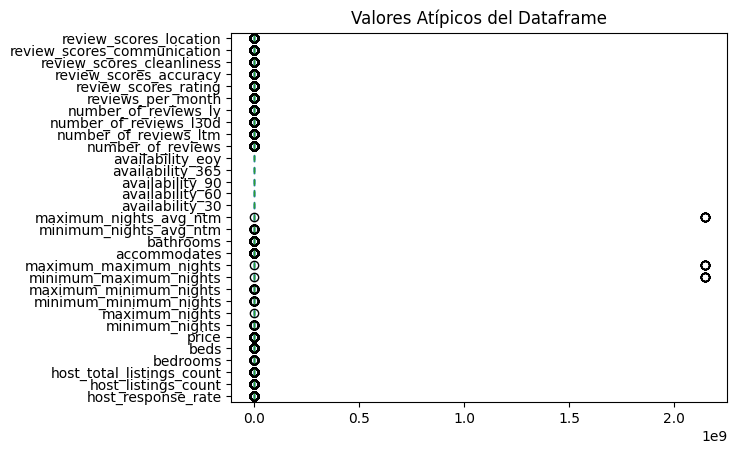

In [98]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
#MÉTODO CUARTÍLICO: CONSIDERA MÁS ATÍPICOS
fig = plt.figure(figsize =(15, 8))
cuantitativas.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

**PROCEDIMIENTO "DESVIACIÓN ESTÁNDAR" PARA ELIMINAR OUTLIERS EN DATAFRAME**


In [99]:
#Método aplicando desviación estandar. Encuentro los valores extremos

#ESTE MÉTODO CONSIDERA MENOS ATÍPICOS


y=cuantitativas
Limite_Superior= y.mean() + 3*y.std() #SE AGREGAN 3 DESVIACIONES ESTANDAR 
Limite_Inferior= y.mean() - 3*y.std() #SE RESTAN 3 STV PARA ASEGURAR EL 95.5% DE LA INFO.
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido host_response_rate             1.217892e+02
host_listings_count            1.460612e+03
host_total_listings_count      2.310375e+03
bedrooms                       7.013861e+00
beds                           9.647653e+00
price                          1.081465e+04
minimum_nights                 8.967083e+01
maximum_nights                 1.652994e+03
minimum_minimum_nights         8.776605e+01
maximum_minimum_nights         8.889043e+01
minimum_maximum_nights         2.493431e+08
maximum_maximum_nights         2.493432e+08
accommodates                   1.424023e+01
bathrooms                      5.441186e+00
minimum_nights_avg_ntm         8.804609e+01
maximum_nights_avg_ntm         2.493432e+08
availability_30                5.070170e+01
availability_60                1.031872e+02
availability_90                1.560495e+02
availability_365               5.972947e+02
availability_eoy               3.397484e+02
number_of_reviews              3.737443e+02
number

In [100]:
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
#CONDICIÓN PARA ELIMINAR LOS OUTLIERS FUERA DE LOS LÍMITES
data3= cuantitativas[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data3

,host_response_rate,host_listings_count,host_total_listings_count,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,...,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,number_of_reviews_ly,reviews_per_month,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_communication,review_scores_location
0,100.0,1.0,1.0,1.0,1.0,62.0,1.0,365.0,1.0,1.0,...,NaN,1.0,0.0,0.0,2.73,4.89,4.95,4.87,4.98,4.68
1,100.0,1.0,2.0,1.0,1.0,150.0,30.0,1125.0,30.0,30.0,...,316.0,8.0,0.0,19.0,1.81,4.94,4.92,4.93,4.98,4.84
2,100.0,1.0,1.0,1.0,2.0,0.0,3.0,29.0,1.0,3.0,...,NaN,50.0,0.0,54.0,4.54,4.90,4.94,4.95,4.98,4.55
3,100.0,1.0,1.0,2.0,2.0,121.0,30.0,91.0,30.0,30.0,...,NaN,5.0,0.0,17.0,2.91,4.96,4.95,4.99,4.99,4.84
4,100.0,2.0,3.0,1.0,1.0,80.0,1.0,30.0,1.0,1.0,...,NaN,51.0,4.0,39.0,5.71,4.83,4.85,4.77,4.91,4.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7517,100.0,1.0,1.0,2.0,1.0,106.0,35.0,90.0,35.0,35.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
7518,100.0,6.0,6.0,3.0,4.0,89.0,2.0,365.0,2.0,2.0,...,1.0,1.0,1.0,0.0,1.00,5.00,5.00,5.00,5.00,5.00
7519,100.0,4.0,6.0,NaN,NaN,789.0,1.0,1125.0,2.0,30.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
7520,100.0,159.0,387.0,5.0,9.0,477.0,1.0,1125.0,1.0,6.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00


In [101]:
#Corroboramos valores nulos del dataframe4
valores_nulos=data3.isnull().sum()
valores_nulos


host_response_rate             118
host_listings_count            158
host_total_listings_count      215
bedrooms                        73
beds                           137
price                           49
minimum_nights                  41
maximum_nights                   1
minimum_minimum_nights          38
maximum_minimum_nights          45
minimum_maximum_nights          11
maximum_maximum_nights          11
accommodates                   164
bathrooms                      116
minimum_nights_avg_ntm          39
maximum_nights_avg_ntm          11
availability_30                  0
availability_60                  0
availability_90                  0
availability_365                 0
availability_eoy                 0
number_of_reviews              143
number_of_reviews_ltm           68
number_of_reviews_l30d         112
number_of_reviews_ly            80
reviews_per_month               67
review_scores_rating             0
review_scores_accuracy           0
review_scores_cleanl

In [102]:
#Corroboramos valores nulos del dataframe4
valores_nulos=data3.isnull().sum().sum()
valores_nulos

np.int64(1697)

In [103]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean=data3.copy()
data_clean=data_clean.fillna(round(data3.mean(),1))
data_clean

,host_response_rate,host_listings_count,host_total_listings_count,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,...,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,number_of_reviews_ly,reviews_per_month,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_communication,review_scores_location
0,100.0,1.0,1.0,1.0,1.0,62.0,1.0,365.0,1.0,1.0,...,56.7,1.0,0.0,0.0,2.73,4.89,4.95,4.87,4.98,4.68
1,100.0,1.0,2.0,1.0,1.0,150.0,30.0,1125.0,30.0,30.0,...,316.0,8.0,0.0,19.0,1.81,4.94,4.92,4.93,4.98,4.84
2,100.0,1.0,1.0,1.0,2.0,0.0,3.0,29.0,1.0,3.0,...,56.7,50.0,0.0,54.0,4.54,4.90,4.94,4.95,4.98,4.55
3,100.0,1.0,1.0,2.0,2.0,121.0,30.0,91.0,30.0,30.0,...,56.7,5.0,0.0,17.0,2.91,4.96,4.95,4.99,4.99,4.84
4,100.0,2.0,3.0,1.0,1.0,80.0,1.0,30.0,1.0,1.0,...,56.7,51.0,4.0,39.0,5.71,4.83,4.85,4.77,4.91,4.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7517,100.0,1.0,1.0,2.0,1.0,106.0,35.0,90.0,35.0,35.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
7518,100.0,6.0,6.0,3.0,4.0,89.0,2.0,365.0,2.0,2.0,...,1.0,1.0,1.0,0.0,1.00,5.00,5.00,5.00,5.00,5.00
7519,100.0,4.0,6.0,2.1,2.7,789.0,1.0,1125.0,2.0,30.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
7520,100.0,159.0,387.0,5.0,9.0,477.0,1.0,1125.0,1.0,6.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00


In [104]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data_clean.isnull().sum()
valores_nulos

host_response_rate             0
host_listings_count            0
host_total_listings_count      0
bedrooms                       0
beds                           0
price                          0
minimum_nights                 0
maximum_nights                 0
minimum_minimum_nights         0
maximum_minimum_nights         0
minimum_maximum_nights         0
maximum_maximum_nights         0
accommodates                   0
bathrooms                      0
minimum_nights_avg_ntm         0
maximum_nights_avg_ntm         0
availability_30                0
availability_60                0
availability_90                0
availability_365               0
availability_eoy               0
number_of_reviews              0
number_of_reviews_ltm          0
number_of_reviews_l30d         0
number_of_reviews_ly           0
reviews_per_month              0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_communication    0
review_sco

**PROCEDIMIENTO "CUANTILES" PARA SUSTITUIR OUTLIERS EN DATAFRAME**

In [105]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=cuantitativas

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido host_response_rate              100.000
host_listings_count              46.000
host_total_listings_count        64.500
bedrooms                          6.000
beds                              4.500
price                           395.000
minimum_nights                   73.500
maximum_nights                 1615.000
minimum_minimum_nights           73.500
maximum_minimum_nights           70.500
minimum_maximum_nights         2272.125
maximum_maximum_nights         2265.000
accommodates                     12.000
bathrooms                         3.500
minimum_nights_avg_ntm           72.000
maximum_nights_avg_ntm         2265.000
availability_30                  55.000
availability_60                 107.125
availability_90                 150.000
availability_365                687.625
availability_eoy                339.000
number_of_reviews               222.000
number_of_reviews_ltm            47.500
number_of_reviews_l30d            2.500
number_of_revi

In [106]:
#Obtenemos datos limpios del Dataframe
data3_iqr= cuantitativas[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3_iqr

,host_response_rate,host_listings_count,host_total_listings_count,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,...,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,number_of_reviews_ly,reviews_per_month,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_communication,review_scores_location
0,100.0,1.0,1.0,1.0,1.0,62.0,1.0,365.0,1.0,1.0,...,NaN,1.0,0.0,0.0,2.73,4.89,4.95,4.87,4.98,4.68
1,100.0,1.0,2.0,1.0,1.0,150.0,30.0,1125.0,30.0,30.0,...,NaN,8.0,0.0,19.0,1.81,4.94,4.92,4.93,4.98,4.84
2,100.0,1.0,1.0,1.0,2.0,0.0,3.0,29.0,1.0,3.0,...,NaN,NaN,0.0,NaN,4.54,4.90,4.94,4.95,4.98,4.55
3,100.0,1.0,1.0,2.0,2.0,121.0,30.0,91.0,30.0,30.0,...,NaN,5.0,0.0,17.0,2.91,4.96,4.95,4.99,4.99,4.84
4,100.0,2.0,3.0,1.0,1.0,80.0,1.0,30.0,1.0,1.0,...,NaN,NaN,NaN,39.0,NaN,4.83,4.85,4.77,4.91,4.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7517,100.0,1.0,1.0,2.0,1.0,106.0,35.0,90.0,35.0,35.0,...,0.0,0.0,0.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN
7518,100.0,6.0,6.0,3.0,4.0,89.0,2.0,365.0,2.0,2.0,...,1.0,1.0,1.0,0.0,1.00,5.00,5.00,5.00,5.00,5.00
7519,100.0,4.0,6.0,NaN,NaN,NaN,1.0,1125.0,2.0,30.0,...,0.0,0.0,0.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN
7520,100.0,NaN,NaN,5.0,NaN,NaN,1.0,1125.0,1.0,6.0,...,0.0,0.0,0.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN


In [107]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data3_iqr.isnull().sum()
valores_nulos

host_response_rate              754
host_listings_count            1253
host_total_listings_count      1191
bedrooms                        102
beds                           1153
price                           638
minimum_nights                   43
maximum_nights                    1
minimum_minimum_nights           39
maximum_minimum_nights           47
minimum_maximum_nights           12
maximum_maximum_nights           12
accommodates                    223
bathrooms                       423
minimum_nights_avg_ntm           41
maximum_nights_avg_ntm           12
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
availability_eoy                  0
number_of_reviews               533
number_of_reviews_ltm           309
number_of_reviews_l30d          881
number_of_reviews_ly            344
reviews_per_month               192
review_scores_rating           1321
review_scores_accuracy      

In [108]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data3_iqr.isnull().sum()
valores_nulos.sum()

np.int64(14917)

In [109]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data4_iqr=data3_iqr.copy()
data4_iqr=data4_iqr.fillna(round(data3_iqr.mean(),1))
data4_iqr

,host_response_rate,host_listings_count,host_total_listings_count,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,...,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,number_of_reviews_ly,reviews_per_month,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_communication,review_scores_location
0,100.0,1.0,1.0,1.0,1.0,62.0,1.0,365.0,1.0,1.0,...,44.4,1.0,0.0,0.0,2.73,4.89,4.95,4.87,4.98,4.68
1,100.0,1.0,2.0,1.0,1.0,150.0,30.0,1125.0,30.0,30.0,...,44.4,8.0,0.0,19.0,1.81,4.94,4.92,4.93,4.98,4.84
2,100.0,1.0,1.0,1.0,2.0,0.0,3.0,29.0,1.0,3.0,...,44.4,9.8,0.0,9.5,4.54,4.90,4.94,4.95,4.98,4.55
3,100.0,1.0,1.0,2.0,2.0,121.0,30.0,91.0,30.0,30.0,...,44.4,5.0,0.0,17.0,2.91,4.96,4.95,4.99,4.99,4.84
4,100.0,2.0,3.0,1.0,1.0,80.0,1.0,30.0,1.0,1.0,...,44.4,9.8,0.4,39.0,1.20,4.83,4.85,4.77,4.91,4.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7517,100.0,1.0,1.0,2.0,1.0,106.0,35.0,90.0,35.0,35.0,...,0.0,0.0,0.0,0.0,0.00,4.80,4.90,4.80,4.90,4.80
7518,100.0,6.0,6.0,3.0,4.0,89.0,2.0,365.0,2.0,2.0,...,1.0,1.0,1.0,0.0,1.00,5.00,5.00,5.00,5.00,5.00
7519,100.0,4.0,6.0,2.1,2.2,120.9,1.0,1125.0,2.0,30.0,...,0.0,0.0,0.0,0.0,0.00,4.80,4.90,4.80,4.90,4.80
7520,100.0,6.9,9.5,5.0,2.2,120.9,1.0,1125.0,1.0,6.0,...,0.0,0.0,0.0,0.0,0.00,4.80,4.90,4.80,4.90,4.80


In [110]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data4_iqr.isnull().sum()
valores_nulos.sum()

np.int64(0)

<Figure size 1500x800 with 0 Axes>

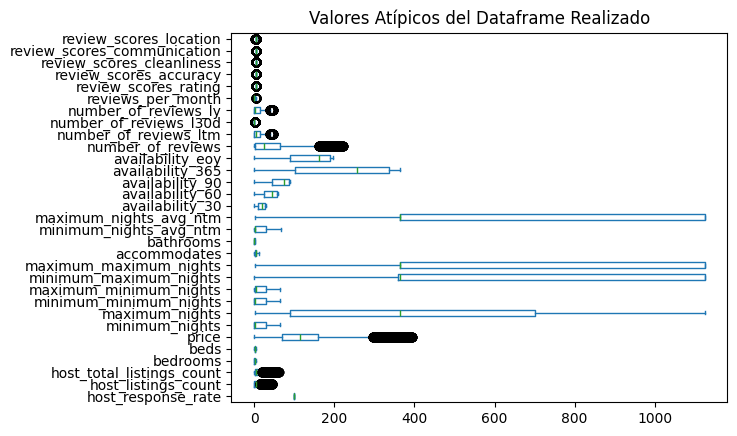

In [111]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
#MÉTODO CUARTÍLICO: CONSIDERA MÁS ATÍPICOS
fig = plt.figure(figsize =(15, 8))
data4_iqr.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe Realizado")
plt.show() #dibujamos el diagrama

In [112]:
# Unimos el dataframe cuantitativo limpio con el dataframe cualitativo

Datos_limpios = pd.concat([cualitativas, data4_iqr], axis=1)
Datos_limpios

,latitude,longitude,neighbourhood_cleansed,property_type,room_type,host_since,host_location,host_response_time,host_is_superhost,host_has_profile_pic,...,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,number_of_reviews_ly,reviews_per_month,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_communication,review_scores_location
0,29.961000,-90.119500,Leonidas,Entire rental unit,Entire home/apt,2010-01-23,"New Orleans, LA",within an hour,f,t,...,44.4,1.0,0.0,0.0,2.73,4.89,4.95,4.87,4.98,4.68
1,29.961530,-90.043640,Bywater,Entire rental unit,Entire home/apt,2011-01-29,"New Orleans, LA",within an hour,t,t,...,44.4,8.0,0.0,19.0,1.81,4.94,4.92,4.93,4.98,4.84
2,29.978030,-90.074500,Seventh Ward,Entire rental unit,Entire home/apt,2011-03-07,"New Orleans, LA",within an hour,t,t,...,44.4,9.8,0.0,9.5,4.54,4.90,4.94,4.95,4.98,4.55
3,29.964480,-90.036670,St. Claude,Entire guest suite,Entire home/apt,2011-03-07,"New Orleans, LA",within an hour,t,t,...,44.4,5.0,0.0,17.0,2.91,4.96,4.95,4.99,4.99,4.84
4,29.968110,-90.059050,Marigny,Private room in home,Private room,2011-03-12,"New Orleans, LA",within an hour,t,t,...,44.4,9.8,0.4,39.0,1.20,4.83,4.85,4.77,4.91,4.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7517,29.975010,-90.052740,St. Roch,Entire home,Entire home/apt,2011-04-25,"New Orleans, LA",within an hour,f,t,...,0.0,0.0,0.0,0.0,0.00,4.80,4.90,4.80,4.90,4.80
7518,29.943146,-90.083162,Central City,Entire home,Entire home/apt,2024-04-20,"New Orleans, LA",within an hour,f,t,...,1.0,1.0,1.0,0.0,1.00,5.00,5.00,5.00,5.00,5.00
7519,29.966019,-90.067761,Treme - Lafitte,Entire home,Entire home/apt,2024-10-31,"New Orleans, LA",within an hour,t,t,...,0.0,0.0,0.0,0.0,0.00,4.80,4.90,4.80,4.90,4.80
7520,29.961450,-90.040630,Bywater,Entire townhouse,Entire home/apt,2019-07-17,"New Orleans, LA",within an hour,t,t,...,0.0,0.0,0.0,0.0,0.00,4.80,4.90,4.80,4.90,4.80


In [113]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=Datos_limpios.isnull().sum()
valores_nulos

latitude                       0
longitude                      0
neighbourhood_cleansed         0
property_type                  0
room_type                      0
host_since                     0
host_location                  0
host_response_time             0
host_is_superhost              0
host_has_profile_pic           0
host_identity_verified         0
bathrooms_text                 0
amenities                      0
has_availability               0
host_response_rate             0
host_listings_count            0
host_total_listings_count      0
bedrooms                       0
beds                           0
price                          0
minimum_nights                 0
maximum_nights                 0
minimum_minimum_nights         0
maximum_minimum_nights         0
minimum_maximum_nights         0
maximum_maximum_nights         0
accommodates                   0
bathrooms                      0
minimum_nights_avg_ntm         0
maximum_nights_avg_ntm         0
availabili

**Finalmente, decidí ocupar el método de cuartiles, ya que se ajusta mejor a la base de datos ocupada de mi país. La información no se veía normalizada, y presentaba muchos outliers, por lo tanto era conveniente ocupar Cuantiles (IQR), ya que se basa en los percentiles (Q1 y Q3), y no en la media. Además, detecta cualquier valor que esté muy por debajo de Q1 o muy por encima de Q3. **

In [114]:
Datos_limpios.to_csv("NuevaOrleans_SinValoresAtípicos.csv", index=False)  